# 正則化(罰則付き)回帰モデル: Ridge回帰

線形回帰では、説明変数を多く投入すると過学習を起こす場合があります。

そのため、下記のような手法で過学習を抑えるようにしています：

1. 情報量基準等を使用して変数選択します。

2. 損失関数に正則化項を入れて過学習を抑制します。標準偏回帰係数の絶対値を抑えます。

ここでは、主に2の手法について説明します。

損失関数に、正則化項を追加します。

リッジ回帰では、この正則化項を係数の2乗和(L2正則化項)を採用しています。

※ 正則化する為、入力特徴量を標準化が必要です。(平均0、偏差1)

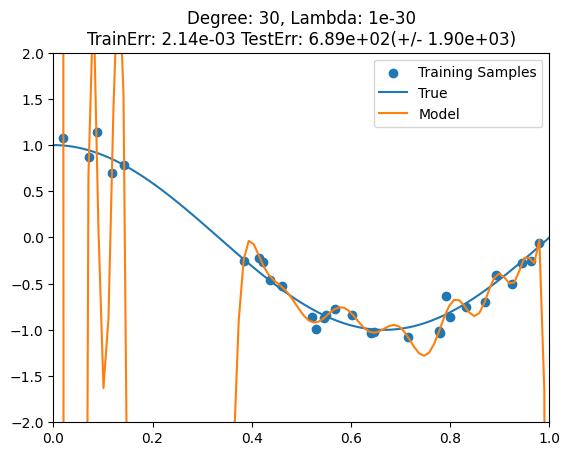

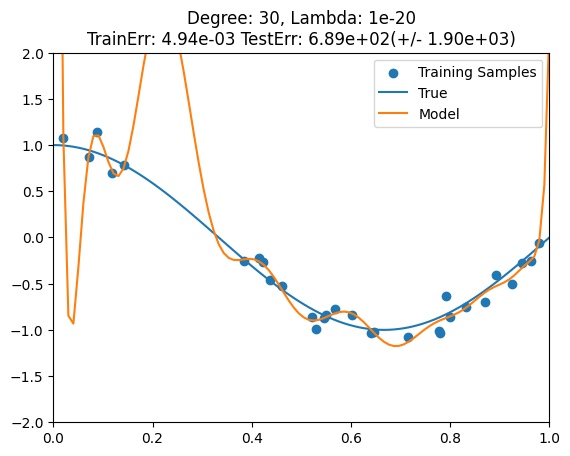

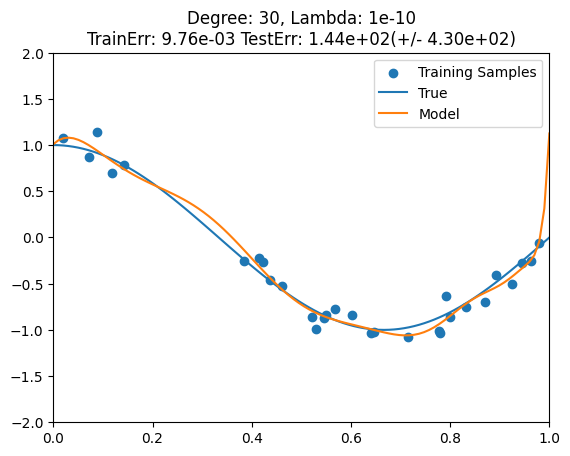

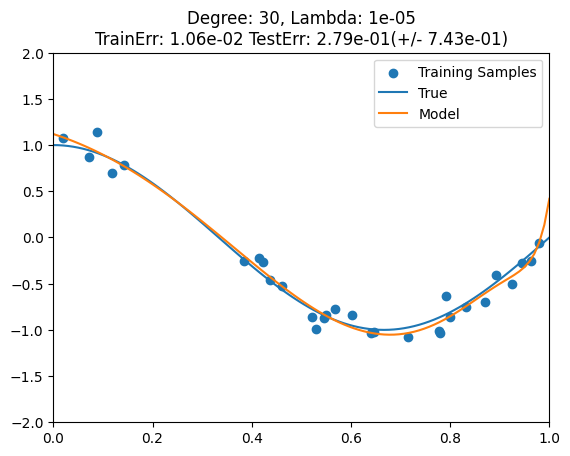

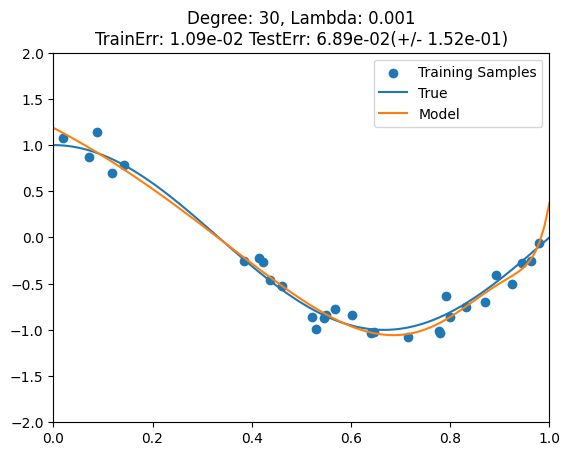

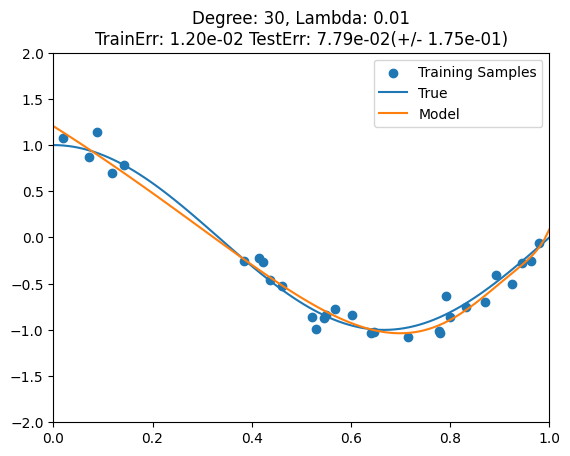

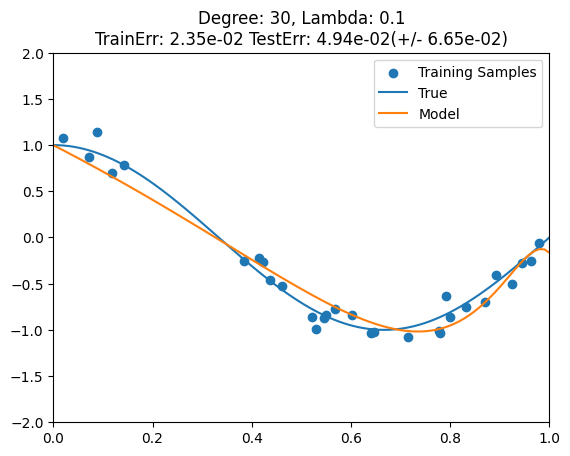

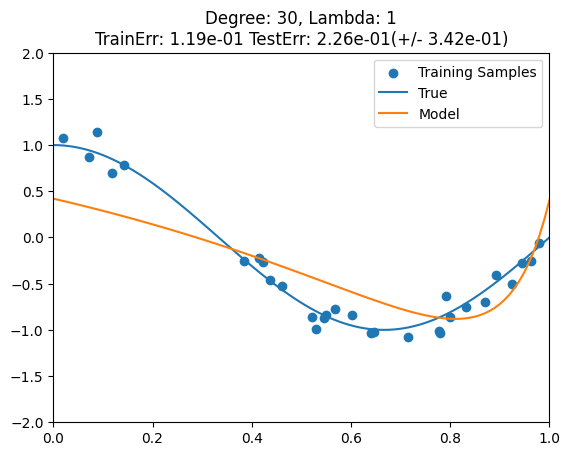

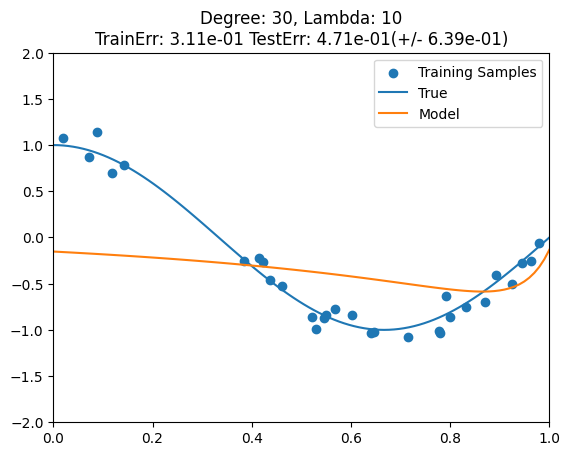

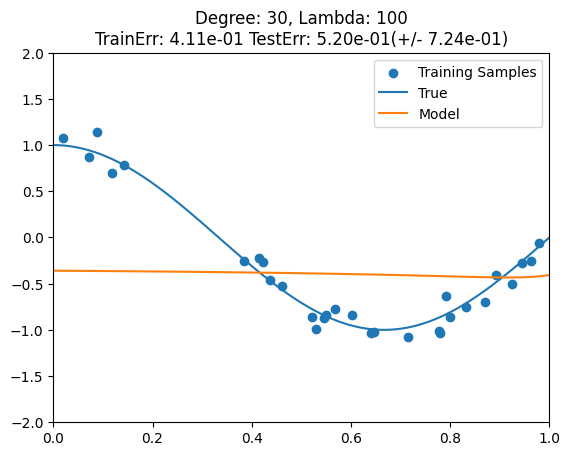

<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# ignore warning message
import warnings
warnings.filterwarnings('ignore')

DEGREE = 30

def true_f(x):
    return np.cos(1.5 * x * np.pi)

np.random.seed(0)
n_samples = 30

# x-axis' plot data
x_plot = np.linspace(0,1,100)
# training data
x_tr = np.sort(np.random.rand(n_samples))
y_tr = true_f(x_tr) + np.random.randn(n_samples) * 0.1
# transfer matrix
X_tr = x_tr.reshape(-1,1)
X_plot = x_plot.reshape(-1,1)
degree = DEGREE
alpha_list = [1e-30,1e-20,1e-10,1e-5, 1e-3,1e-2,1e-1, 1,10,100]
message = []
for alpha in alpha_list:
    plt.scatter(x_tr,y_tr,label="Training Samples")
    plt.plot(x_plot,true_f(x_plot),label="True")
    plt.xlim(0,1)
    plt.ylim(-2,2)
    
    pf = PF(degree=degree,include_bias=False)
    linear_reg = linear_model.Ridge(alpha=alpha) # the only parameter changed
    steps = [("Polynomial_Features",pf),("Linear_Regression",linear_reg)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_tr,y_tr)
    plt.plot(x_plot,pipeline.predict(X_plot),label="Model")
    y_predict = pipeline.predict(X_tr)
    mse = mean_squared_error(y_tr,y_predict)
    scores = cross_val_score(pipeline,X_tr,y_tr,scoring="neg_mean_squared_error",cv=10)
    plt.title(f"Degree: {degree}, Lambda: {alpha}\nTrainErr: {mse:.2e} TestErr: {-scores.mean():.2e}(+/- {scores.std():.2e})")
    plt.legend()
    plt.show()
    plt.clf()
    message.append(f"正則化パラメータ = {alpha}, 訓練誤差 = {mse}, テスト誤差 = {-scores.mean():.2e}")

正則化のため、各パラメータの重みが全体で滑らかにする必要があります。

リッジ回帰は、L2ノルム(ユーグリット距離計算)のを正則化項として使います。

このパラメータが低ければ、訓練誤差が小さくなりますが、過学習の恐れがあります。

パラメータが高ければ、モデルのグラフが滑らかになりますが、効きすぎるとデータの平均を取るだけのモデルになってしまいます。

なのでリッジ回帰の正則化パラメータはチューニングする必要があります。

よくあるのが、logスケールでパラメータをある範囲に絞り込み、そこから線形スケールで最適パラメータを探し当てます。

In [2]:
for m in message:
    print(m)

正則化パラメータ = 1e-30, 訓練誤差 = 0.0021425237650003312, テスト誤差 = 6.89e+02
正則化パラメータ = 1e-20, 訓練誤差 = 0.004936192309525021, テスト誤差 = 6.89e+02
正則化パラメータ = 1e-10, 訓練誤差 = 0.009762751470399603, テスト誤差 = 1.44e+02
正則化パラメータ = 1e-05, 訓練誤差 = 0.010595653150431284, テスト誤差 = 2.79e-01
正則化パラメータ = 0.001, 訓練誤差 = 0.010856091742299363, テスト誤差 = 6.89e-02
正則化パラメータ = 0.01, 訓練誤差 = 0.012046102850453823, テスト誤差 = 7.79e-02
正則化パラメータ = 0.1, 訓練誤差 = 0.02351033489834409, テスト誤差 = 4.94e-02
正則化パラメータ = 1, 訓練誤差 = 0.11886509938269861, テスト誤差 = 2.26e-01
正則化パラメータ = 10, 訓練誤差 = 0.31077333649742883, テスト誤差 = 4.71e-01
正則化パラメータ = 100, 訓練誤差 = 0.41104732329314453, テスト誤差 = 5.20e-01


体感では、0.01の場合が最適に見えましたが、

0.1の方のテスト誤差が低くなってます。